In [3]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

In [13]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = {"^IXIC":"NASDAQ", 
          "^GSPC":"S&P 500",
          "^RUA":"RUSSELL 3000",
          "^RUT":"RUSSELL 2000", 
          "^DJI":"DJIA"
}
for stock, name in stocks.items():
    data_dict[name] = web.get_data_yahoo(stock, start, end)
close_data = pd.concat([df["Close"] for df in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
close_data
close_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NASDAQ,S&P 500,RUSSELL 3000,RUSSELL 2000,DJIA
Date,,,,,
2012-01-03,2648.719971,1277.060059,753.739990,752.280029,12397.379883
2012-01-04,2648.360107,1277.300049,753.309998,747.280029,12418.419922
2012-01-05,2669.860107,1281.060059,756.190002,752.289978,12415.700195
2012-01-06,2674.219971,1277.810059,754.510010,749.710022,12359.919922
2012-01-09,2676.560059,1280.699951,756.590027,753.510010,12392.690430
...,...,...,...,...,...
2023-12-07,14339.990234,4585.589844,2630.179932,1868.250000,36117.378906
2023-12-08,14403.969727,4604.370117,2641.929932,1880.819946,36247.871094
2023-12-11,14432.490234,4622.439941,2652.239990,1883.680054,36404.929688


In [14]:
scale_data = close_data.copy()
for key, val in close_data.items():
    scale_data[key] = val.div(val.iloc[0])
scale_data

,NASDAQ,S&P 500,RUSSELL 3000,RUSSELL 2000,DJIA
Date,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-04,0.999864,1.000188,0.999430,0.993354,1.001697
2012-01-05,1.007981,1.003132,1.003250,1.000013,1.001478
2012-01-06,1.009627,1.000587,1.001022,0.996584,0.996978
2012-01-09,1.010511,1.002850,1.003781,1.001635,0.999622
...,...,...,...,...,...
2023-12-07,5.413932,3.590739,3.489506,2.483450,2.913307
2023-12-08,5.438087,3.605445,3.505095,2.500159,2.923833
2023-12-11,5.448855,3.619595,3.518773,2.503961,2.936502


<AxesSubplot:xlabel='Date'>

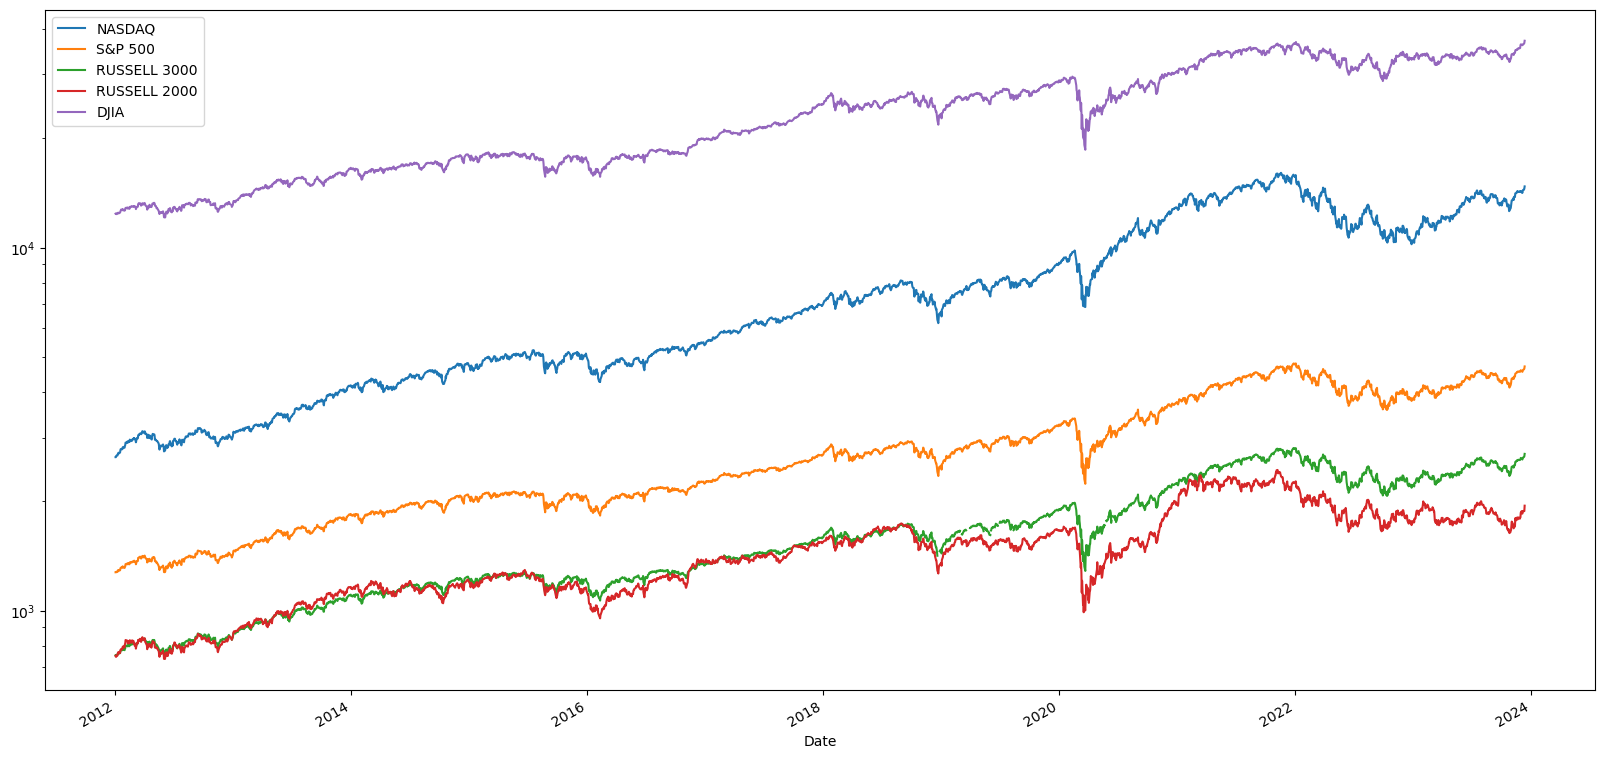

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
close_data.plot.line(ax = ax, logy = True)


<AxesSubplot:xlabel='Date'>

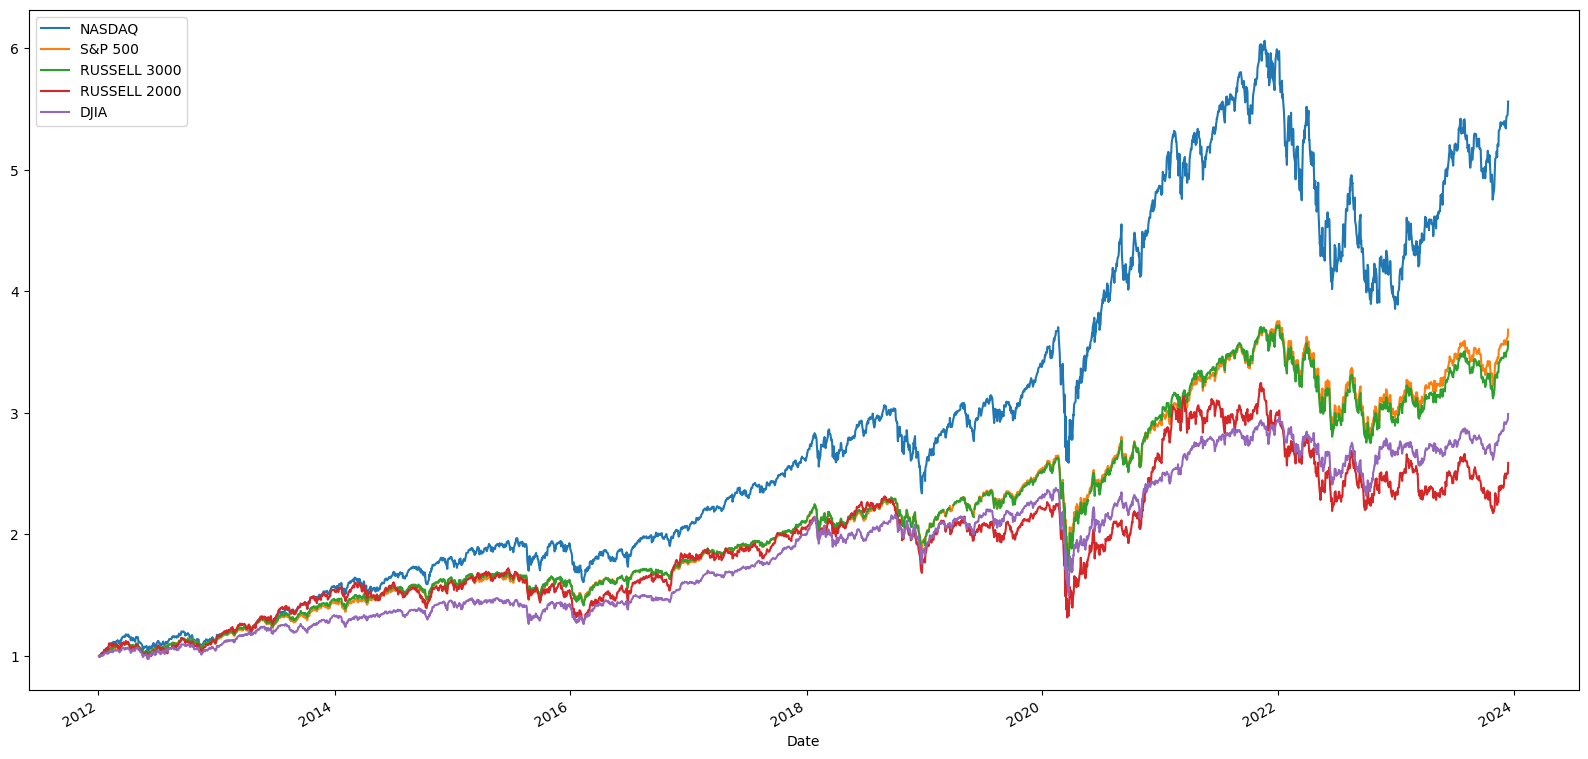

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
scale_data.plot.line(ax = ax)


NameError: name 'np' is not defined

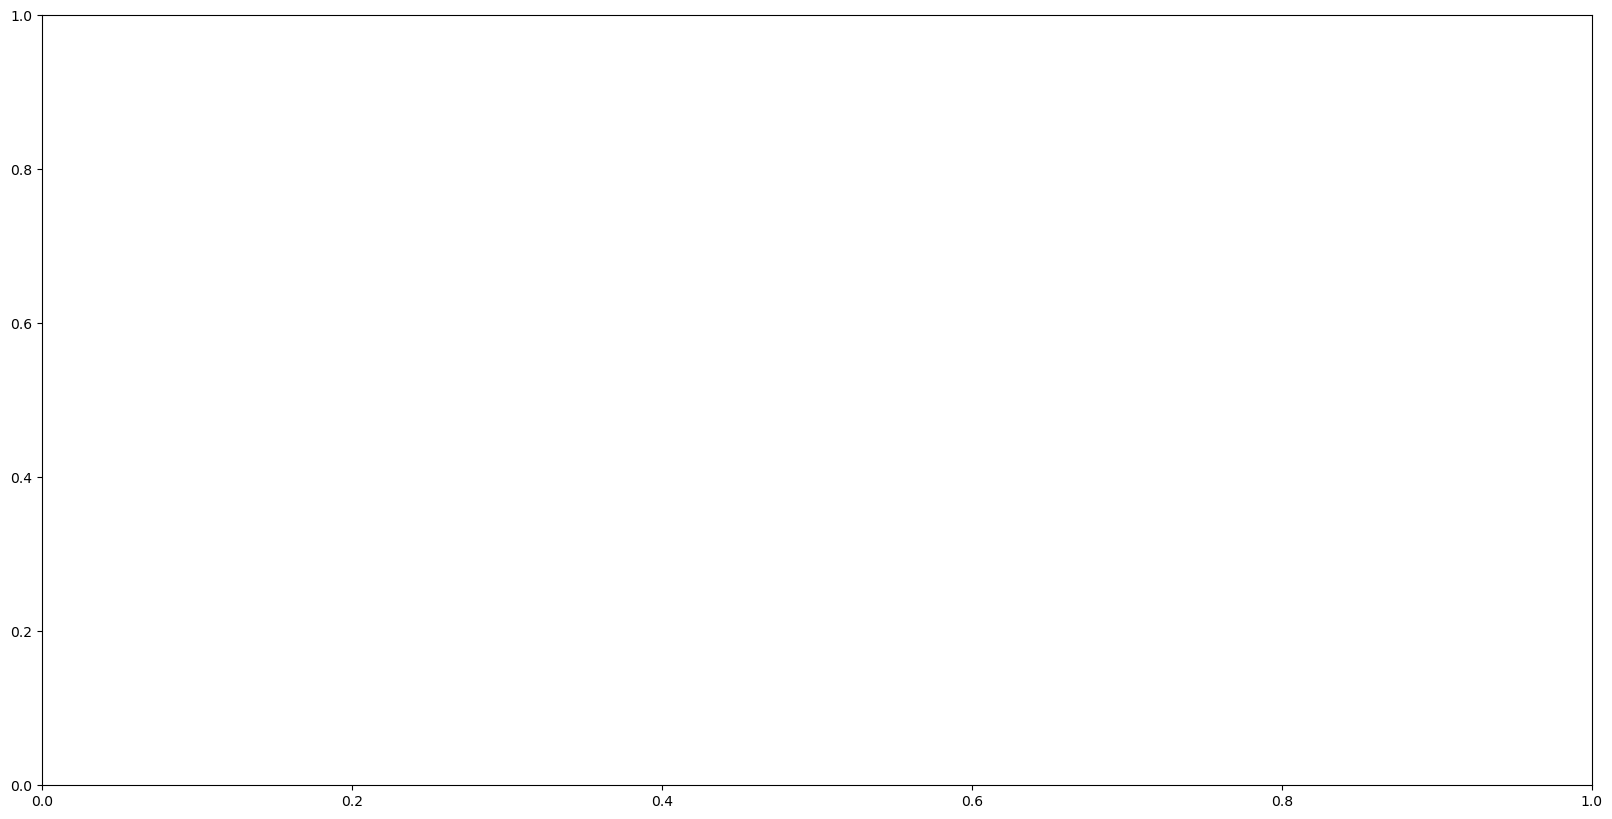

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
np.log(scale_data).diff(255).plot.line(ax = ax)
